In [229]:
import torch
from skimage import data

im = data.coffee()[:, :, 1]
#im = im[:128,:128]
im = torch.from_numpy(im)

torch.Size([400, 600])

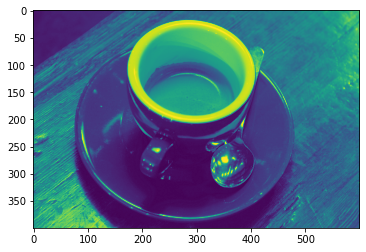

In [230]:
import matplotlib.pyplot as plt
plt.imshow(im)
im.shape

In [231]:
import numpy as np
def convolution(input, kernel):
    H, W = input.shape
    kH, kW = kernel.shape
    out = torch.zeros(((H - kH + 1), (W - kW + 1)))
    for r in range(0, H - kH + 1):
        for c in range(0, W - kW + 1):
            out[r, c] = (input[r:r+kH,c:c+kW]* kernel).sum((0, 1))
            #print(res.shape, (r, c))
    return out

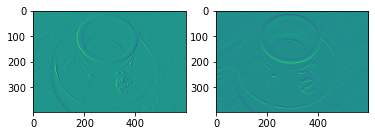

In [232]:
kernel_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

kernel_y = np.array([[ 1, 2, 1],
                     [ 0, 0, 0],
                     [-1,-2,-1]])

out_x = convolution(im, kernel_x)
out_y = convolution(im, kernel_y)
fig , axs = plt.subplots(1, 2)

out = [out_x, out_y]

for i in range(2):
    axs[i].imshow(out[i])

tensor(240.3062)

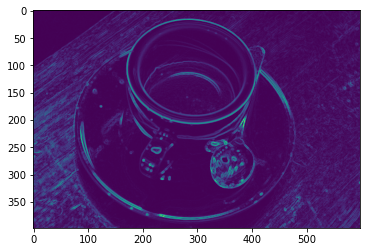

In [233]:
mag = torch.sqrt(torch.pow(out_x, 2) + torch.pow(out_y, 2))

normmag = (mag * 255) / 1081
plt.imshow(normmag)
normmag.max()

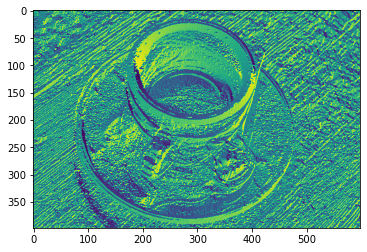

In [234]:
import math
theta = np.arctan2(out_y, out_x)

grad_theta = theta + math.pi

grad_theta = (grad_theta * 360) / (2*math.pi)

normgrad_theta = (grad_theta * 180) / (360)
normgrad_theta[normgrad_theta == 180] = 0
normgrad_theta.max()


plt.imshow(theta)

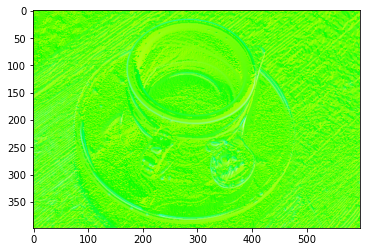

In [235]:
HSV = torch.zeros((im.shape[0] - 2, im.shape[1] - 2, 3))
HSV[:, :, 0] = normgrad_theta
HSV[:, :, 1] = 255
HSV[:, :, 2] = normmag
HSV = HSV.type(torch.uint8).numpy()
plt.imshow(HSV)

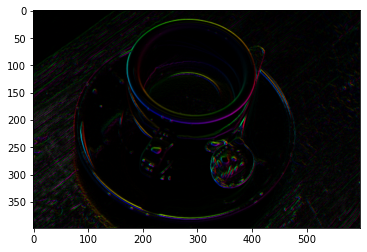

In [236]:
import cv2
RGBHSV = cv2.cvtColor(HSV, cv2.COLOR_HSV2RGB)
plt.imshow(RGBHSV)
